In [1]:
#!pip install braid_tools


DEPRECATION: Loading egg at c:\users\mayc06\appdata\local\anaconda3\envs\celliniwindsim\lib\site-packages\flyplotlib-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\mayc06\appdata\local\anaconda3\envs\celliniwindsim\lib\site-packages\pychebfun-0.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement braid_tools (from versions: none)
ERROR: No matching distribution found for braid_tools


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from braid_analysis import braid_filemanager
from braid_analysis import braid_slicing
from braid_analysis import braid_analysis_plots
from braid_analysis import flymath

import pandas

C:\Users\mayc06\AppData\Local\anaconda3\envs\CelliniWindSim\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


# Load preprocessed hdf

In [3]:
hdf_filename =  'WT_20250626_170346_preprocessed_realodor.hdf'
# WT_20250626_170346_preprocessed_realodor.hdf
# PFNsilenced_20250627_182706_preprocessed_realodor.hdf
braid_df = pandas.read_hdf(hdf_filename)

# Investigate keys

In [25]:
_ = [print(k) for k in braid_df.keys()]

obj_id
frame
timestamp
x
y
z
xvel
yvel
zvel
P00
P01
P02
P11
P12
P22
P33
P44
P55
obj_id_unique
speed_xy
course
course_smoothish
ang_vel_smoothish
alicat_flow_rate
braid_flow_controls
binary_odor_value_for_cylindrical_plume


In [4]:
braid_df.head(10)

,obj_id,frame,timestamp,x,y,z,xvel,yvel,zvel,P00,...,P44,P55,obj_id_unique,speed_xy,course,course_smoothish,ang_vel_smoothish,alicat_flow_rate,braid_flow_controls,binary_odor_value_for_cylindrical_plume
13288,911,547190,1.750988e+09,-0.508940,-0.092787,0.601269,-0.313339,0.294105,0.161826,7.534679e-07,...,0.022498,0.242128,20250626_170346_911,0.429744,2.387848,2.387962,2.208639,126.871860,150.0,0
13289,911,547191,1.750988e+09,-0.512110,-0.090019,0.603649,-0.315663,0.281363,0.207244,6.489914e-07,...,0.015698,0.084157,20250626_170346_911,0.422857,2.413582,2.410048,1.790788,126.872660,150.0,0
13290,911,547192,1.750988e+09,-0.515070,-0.087472,0.606155,-0.299772,0.261090,0.227090,6.161920e-07,...,0.015572,0.049142,20250626_170346_911,0.397532,2.425054,2.423777,1.459278,126.873460,150.0,0
13291,911,547193,1.750988e+09,-0.517440,-0.085428,0.607274,-0.250405,0.214309,0.177631,6.082230e-07,...,0.015461,0.040152,20250626_170346_911,0.329592,2.433714,2.439234,2.408409,126.874260,150.0,0
13292,911,547194,1.750988e+09,-0.519858,-0.083519,0.607124,-0.244530,0.192029,0.097738,6.060109e-07,...,0.015419,0.038165,20250626_170346_911,0.310918,2.475881,2.471946,4.322529,126.875060,150.0,0
13293,911,547195,1.750988e+09,-0.522652,-0.081502,0.606025,-0.273177,0.195370,0.011626,6.070602e-07,...,0.015431,0.037944,20250626_170346_911,0.335850,2.520754,2.525684,5.908343,126.875860,150.0,0
13294,911,547196,1.750988e+09,-0.525862,-0.079552,0.604388,-0.311735,0.191378,-0.061851,6.104347e-07,...,0.015466,0.038014,20250626_170346_911,0.365793,2.591007,2.590113,6.019593,126.876660,150.0,0
13295,911,547197,1.750988e+09,-0.529125,-0.077845,0.602670,-0.323343,0.172658,-0.108390,6.151299e-07,...,0.015511,0.038086,20250626_170346_911,0.366553,2.651134,2.646076,4.830751,126.877459,150.0,0
13296,911,547198,1.750988e+09,-0.532122,-0.076413,0.601205,-0.304356,0.148629,-0.125190,6.200828e-07,...,0.015555,0.038153,20250626_170346_911,0.338708,2.687318,2.686728,4.313836,126.878259,150.0,0
13297,911,547199,1.750988e+09,-0.535132,-0.075130,0.600109,-0.301761,0.133084,-0.119235,6.243781e-07,...,0.015592,0.038225,20250626_170346_911,0.329804,2.726227,2.732353,5.952669,126.879059,150.0,0


### Explanation of important keys: 
  * obj_id_unique -- original obj id + date of experiment
  * x,y,z -- position
  * xvel, yvel, zvel -- velocities
  * speed_xy -- ground speed in xy plane
  * course_smoothish -- course direction (direction of travel) with some smoothing applied
  * ang_vel_smoothish -- angular velocity (derivative of course) with some smoothing applied
  * flash_frame -- binary, 1 on the frame that a trigger sequence was started
  * trigger_exp -- unique string that corresponds to the type of flash experiment, depends on the preprocessing.yaml file
  * frame -- camera frame
  * time_relative_to_flash -- time relative to flash event start (if sequence of flashes, it will be relative to the start of the sequence)
  * timestamp -- linux time
  * alicat_flow_rate -- actual mass flow rate (sccm)
  * braid_flow_controls -- commanded mass flow rate (sccm)

### Less useful keys:
  * obj_id -- DO NOT USE THIS -- original obj id given by braid, not unique
  * PXX -- diagonal of the EKF error covariance matrix, generally not super useful except perhaps to identify bad tracking events
  * course -- raw course direction (direction of travel)
  * binary_odor_value_for_cylindrical_plume -- placeholder for when we eventually have a plume model -- IGNORE for now

# Set obj_id_key
  * for trimmed datasets use: obj_id_unique_event
  * for raw data use: obj_id_unique

In [6]:
obj_id_key = 'obj_id_unique'

# Check number of trajectories

In [28]:
# print out number of trajectories
num_trajecs = len(braid_df[obj_id_key].unique())
print('Raw number of trajectories: ' + str(num_trajecs))

Raw number of trajectories: 2840


In [29]:
#braid_df.rename(columns={'obj_id_unique':'obj_id'},inplace=True)

# Only keep trajectories > 1 second long

In [30]:
long_obj_ids = braid_slicing.get_long_obj_ids_fast_pandas(braid_df, length=10) # therefore dt = 0.01?

In [31]:
len(long_obj_ids)

2840

In [32]:
braid_df = braid_slicing.get_data_frame_slice_from_obj_ids(braid_df, long_obj_ids)

# Plot histogram of the trajectory lengths

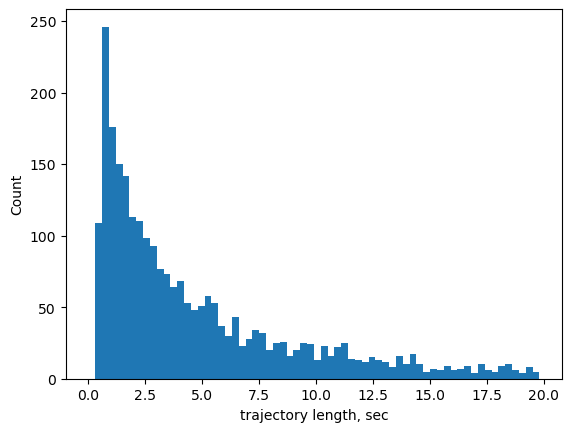

In [7]:
braid_analysis_plots.plot_length_of_trajectories_histogram(braid_df, obj_id_key=obj_id_key)

# Get odor on and odor off dataframes

Note: odor off is not a good control currently, there is too much odor leakage.

In [34]:
df_odor = braid_df[braid_df.braid_flow_controls>0]
df_noodor = braid_df[braid_df.braid_flow_controls==0]

In [35]:
df_odor

,obj_id,frame,timestamp,x,y,z,xvel,yvel,zvel,P00,...,P44,P55,obj_id_unique,speed_xy,course,course_smoothish,ang_vel_smoothish,alicat_flow_rate,braid_flow_controls,binary_odor_value_for_cylindrical_plume
13288,911,547190,1.750988e+09,-0.508940,-0.092787,0.601269,-0.313339,0.294105,0.161826,7.534679e-07,...,0.022498,0.242128,20250626_170346_911,0.429744,2.387848,2.387962,2.208639,126.871860,150.0,0
13289,911,547191,1.750988e+09,-0.512110,-0.090019,0.603649,-0.315663,0.281363,0.207244,6.489914e-07,...,0.015698,0.084157,20250626_170346_911,0.422857,2.413582,2.410048,1.790788,126.872660,150.0,0
13290,911,547192,1.750988e+09,-0.515070,-0.087472,0.606155,-0.299772,0.261090,0.227090,6.161920e-07,...,0.015572,0.049142,20250626_170346_911,0.397532,2.425054,2.423777,1.459278,126.873460,150.0,0
13291,911,547193,1.750988e+09,-0.517440,-0.085428,0.607274,-0.250405,0.214309,0.177631,6.082230e-07,...,0.015461,0.040152,20250626_170346_911,0.329592,2.433714,2.439234,2.408409,126.874260,150.0,0
13292,911,547194,1.750988e+09,-0.519858,-0.083519,0.607124,-0.244530,0.192029,0.097738,6.060109e-07,...,0.015419,0.038165,20250626_170346_911,0.310918,2.475881,2.471946,4.322529,126.875060,150.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829998,32803,6284452,1.751045e+09,0.107194,-0.069843,0.315482,0.694397,0.219885,-2.683031,2.446824e-04,...,0.140214,0.182348,20250626_170346_32803,0.728380,0.306667,0.305720,0.097841,128.009195,150.0,0
3829999,32803,6284453,1.751045e+09,0.114138,-0.067645,0.288652,0.694397,0.219885,-2.683031,3.617792e-04,...,0.160214,0.202348,20250626_170346_32803,0.728380,0.306667,0.307807,0.193757,128.010392,150.0,0
3830000,32803,6284454,1.751045e+09,0.121082,-0.065446,0.261822,0.694397,0.219885,-2.683031,5.114476e-04,...,0.180214,0.222348,20250626_170346_32803,0.728380,0.306667,0.309596,-0.443170,128.011589,150.0,0
3830001,32803,6284455,1.751045e+09,0.128026,-0.063247,0.234991,0.694397,0.219885,-2.683031,6.976875e-04,...,0.200214,0.242348,20250626_170346_32803,0.728380,0.306667,0.298944,-1.967903,128.012785,150.0,0


# Drop frames that are probably on wind tunnel wall, or beyond

Note: this is a hacky approach for making the heatmaps reveal the plume tracking. In some cases these dropped frames will break up trajectories so you would not want to analyze individual trajectory obj ids after this step, unless you take additional filtering steps! 

In [1]:
q = 'y > -0.2 and y < 0.2 and z > 0.1 and z < 0.5'
df_odor_middle = df_odor.query(q)
df_noodor_middle = df_noodor.query(q)

NameError: name 'df_odor' is not defined

In [20]:
#q = 'speed_xy > 0.05 and speed_xy < 2'
#df_odor_middle = df_odor_middle.query(q)

# Plot heatmaps of occupancy

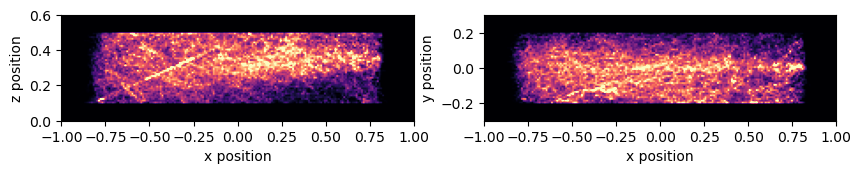

In [37]:
braid_analysis_plots.plot_occupancy_heatmaps(df_odor_middle, -1, 1, -0.3, 0.3, 0.0, 0.6, 
                                             log=False, vmax=0.0003)

In [ ]:
braid_analysis_plots.plot_occupancy_heatmaps(df_odor_middle, -1, 1, -0.3, 0.3, 0.0, 0.6, 
                                             log=False, vmax=0.0003)

# Plot an individual trajectory

In [29]:
## Make a list of dataframes of the trajectories
braid_list = [braid_df[braid_df.obj_id_unique==i] for i in braid_df.obj_id_unique.unique()]

In [39]:
# get an object id
n = 2 # second object
obj_id = braid_df[obj_id_key].unique()[n]

# grab slice of the data
trajec1 = braid_df[braid_df[obj_id_key]==obj_id]

## or simply grab the individual trajectory from the braid_list
trajec2 = braid_list[n]

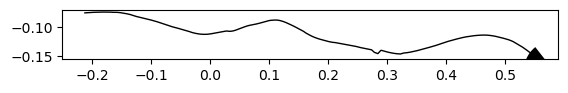

In [40]:
braid_analysis_plots.plot_arrowhead_trajectory(trajec1.x.values, trajec1.y.values)

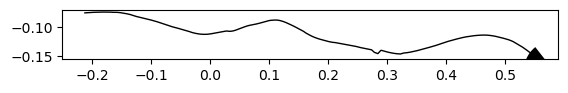

In [41]:
braid_analysis_plots.plot_arrowhead_trajectory(trajec2.x.values, trajec2.y.values)

In [42]:
import seaborn as sns

In [52]:
df_odor_middle.columns

Index(['obj_id', 'frame', 'timestamp', 'x', 'y', 'z', 'xvel', 'yvel', 'zvel',
       'P00', 'P01', 'P02', 'P11', 'P12', 'P22', 'P33', 'P44', 'P55',
       'obj_id_unique', 'speed_xy', 'course', 'course_smoothish',
       'ang_vel_smoothish', 'alicat_flow_rate', 'braid_flow_controls',
       'binary_odor_value_for_cylindrical_plume'],
      dtype='object')

In [ ]:
temp_df = df_odor_middle[['x','y','z']]

In [ ]:
sns.histplot(temp_df)

Text(0, 0.5, 'frames')

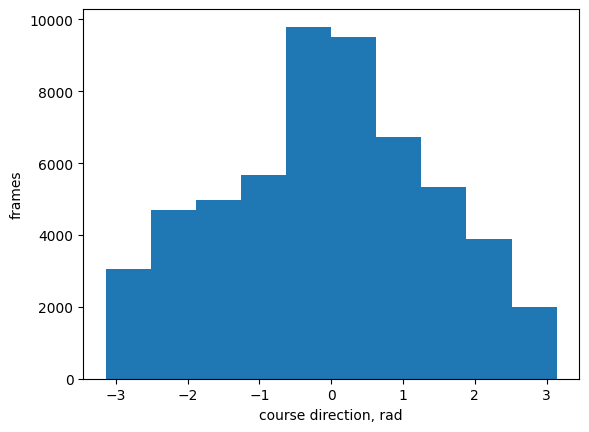

In [15]:
plt.hist(df_odor_middle.course_smoothish)
plt.xlabel('course direction, rad')
plt.ylabel('frames')